In [1]:
#This is the code block #1

!pip install preprocessor
!pip install gdown
!pip install sastrawi
!pip install tweet-preprocessor

#Installing the packages Preprocessor, gdown, sastrawi, tweet-preprocessor.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=47eba4d044388bafb10854bb61bfd94ced7592fb6c04ca6349d8bef2974c9248
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18dbeec4c09309d3edc5461c2a5fffb
Successfully built preprocessor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#This is the code block #2

import preprocessor as p
import pandas as pd
import regex as re
import string
import pandas as pd
import time
import os

#Importing packages used to process text data and to make necessary steps to change the data.

## **Konversi Ke CSV Dan Mengambil Kolom Teks**

In [3]:
#This is the code block #3

dataset_list = os.listdir('raw')

for name in dataset_list:
    if name != '.ipynb_checkpoints':
        print('Dataset :', name)

        df = pd.read_excel(f'raw/{name}')
        df = df[['Text']]

        path = name.split('.')
        df.to_csv(f'processed_text_only/{path[0]}.csv', index=False)

#Read the excel data from raw directory and moving the files into processed_text_only file.

FileNotFoundError: ignored

## **Preprocessing Data**

In [4]:
#This is the code block #4

kata_baku = pd.read_csv('https://raw.githubusercontent.com/ShinyQ/One-Click-Sentiment_BE/main/app/dataset/Kamu-Alay.csv')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

stop_words = list(pd.read_csv('https://raw.githubusercontent.com/ShinyQ/E-Wallet-Sentiment-Analysis_IFest-Unpad-2021/main/dataset/processed/stopwords_id_satya.txt', header=None)[0])

#We read the files from interenet in indonesian language which then used for text normalization and preprocessing.

In [5]:
#This is the code block #5

def cleansing(text):   
    
    text = p.clean(text)
    
    # Mengubah setiap kata menjadi lowercase
    text =  text.lower() 

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Karakter Berulang (Contoh: Horeeee!!!! menjadi Hore!)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus 1 Karakter Terpisah
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)
    
    # Menghapus kata yang mengandung judul topik dan kata yang terdapat pada stopwords indonesia
    temp_text_split = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words:
            if text_split[i] in kata_baku:
                 text_split[i] = kata_baku[text_split[i]]

            temp_text_split.append(str(text_split[i]))
    
    temp_text_split = list(set(temp_text_split))  
    text = ' '.join(temp_text_split)
       
    # Mengembalikan Hasil Preprocessing Text
    return str.lstrip(text)

#This cell used to change the text by removing hyperlinks, repeat workds, replacing newlines with spaces.

In [6]:
#This is the code block #6

dataset_list = os.listdir('processed_text_only')
for name in dataset_list:
    if name != '.ipynb_checkpoints':
        print('Dataset :', name)

        df = pd.read_csv(f'processed_text_only/{name}')
        
        df['Text'] = df['Text'].apply(cleansing)
        df = df[df['Text'].str.split().str.len().gt(2)]
        df.to_csv(f'processed_clean/{name}', index=False)
        
        print(f"Total Data : {len(df)} \n")

#Then we call the directory processed_text_only which applys the cleansisng.
#Then we consider only the text with more than 2 words in the text.

FileNotFoundError: ignored

In [7]:
#This is the code block #7

!gdown --id 1kcC3rB8ylGN5tlDH-RCkSIk7mBQ_rN-h

#The ! at the beginning of the line indicates that the command is being executed in the shell or command prompt.

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kcC3rB8ylGN5tlDH-RCkSIk7mBQ_rN-h
To: /content/Personality Dataset.csv
100% 61.0k/61.0k [00:00<00:00, 103MB/s]


In [8]:
#This is the code block #8

df = pd.read_csv('Personality Dataset.csv')
df.sample(5)

#Then we read the csv which is in the local directory and store it in the df name.

,Text,Traits
203,terima kasih atas informasinya,extraversion
738,pelaku penindasan harus mati,neuroticism
466,sedih kecewa marah gue dibohongin,neuroticism
445,yeay akhirnya bisa review kantor sebelum mulai...,extraversion
712,hanya mengingatkan kalau dia tidak bisa dipercaya,neuroticism


In [9]:
#This is the code block #9

import preprocessor as p
df['Text'] = df['Text'].apply(cleansing)
df = df[df['Text'].str.split().str.len().gt(2)]

print("Total Dataset Latih :", len(df))

#The we apply the function cleansing to the dataframe and taken in anly the data which have a length of words more than 2 in the sentence.

Total Dataset Latih : 983


In [10]:
#This is the code block #10

df.to_csv('Personality Dataset Clean.csv', index=False)

#Then we read the cleaned the data into the csv called Personality Dataset Clean.

# **Personality-Clasification-Using-IndoBERT**


In [11]:
#This is the code block #11

!pip install transformers
!pip install datasets

#Then we install the packages called transformers and datasets.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.2 MB/s eta 0:00:

In [12]:
#This is the code block #12

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from transformers import Trainer
from datasets import load_metric
import matplotlib.pyplot as plt

import os
import seaborn as sns
import pandas as pd
import numpy as np

#Then we load the appropriate packages for the model to predict.

In [13]:
#This is the code block #13

df = pd.read_csv("Personality Dataset Clean.csv")
df.rename(columns={"Traits": "label", "Text": "text"}, inplace=True)
df.sample(5)

#Then we read the cleaned dataset called Personality Dataset Clean and rename the header labels.


,text,label
871,menjengkelkan sih judes,neuroticism
508,masalahnya disesuaikan kirimnya ongkos,neuroticism
525,beli uang ini transferin sepatu,extraversion
11,semoga umur bapak panjang ulang sehat selamat ...,extraversion
559,kota murah yogjakarta harganya istimewa makannya,extraversion


In [14]:
#This is the code block #14

df["label"] = df["label"].map({"neuroticism" : 0, "extraversion": 1})

#Then we label 0 with neuroticism and 1 with extraversion.

In [15]:
#This is the code block #15

RANDOM_SEED = 42

df_train, df_test = train_test_split(
  df,
  test_size=0.1,
  random_state=RANDOM_SEED, 
)

df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED, 
)

#In this first we divide the data into 2 parts df_train and df_test which have df_test of 10% of data.
#And we have 90% of data in Train_set.

#Then we again divide the test data into into two sets
#Which will have 50% of data sets that is 5% of original data in evaluation data_set.
#And test_set have 5% of the original data set.

In [16]:
#This is the code block #16

actual_label = df_test['label']

#This code assign the values of the 'label' column in the df_test dataframe to the actual_label.

In [17]:
#This is the code block #17

df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

#This will help to save the three dataframes to the train.csv, eval.csv and test.csv.

In [18]:
#This is the code block #18

from datasets import load_dataset

files = {
    "train": "train.csv", 
    "eval": "eval.csv", 
    "test": "test.csv"
}

dataset = load_dataset('csv', data_files=files)

#The code uses the load_dataset function from the datasets library to load train, eval, and test data from CSV files. 
#The load_dataset function automatically infers the dataset format based on the file extension, which in this case is CSV.

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-1be0041d2901fa95/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
#This is the code block #19

from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

#It creates an instance of AutoTokenizer with a pre-trained model "indobenchmark/indobert-base-p2". 
#AutoTokenizer is a tokenizer that automatically selects the appropriate tokenizer for the specified pre-trained model.

In [20]:
#This is the code block #20

def tokenize_function(text):
    return tokenizer(text["text"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

#The code defines a function called tokenize_function that tokenizes a given text using a pre-trained tokenizer instance. 
#The function is applied to the entire dataset using the map() method with batched=True parameter to tokenize the dataset and create a new tokenized_datasets object.

Map:   0%|          | 0/884 [00:00<?, ? examples/s]

Map:   0%|          | 0/49 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [21]:
#This is the code block #21

train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

#These datasets are being created by selecting the appropriate parts of the tokenized_datasets object using the keys "train" and "eval". 



In [22]:
#This is the code block #22

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=2)

#We intialize a model that will perform a binary classification task.
#This creates a new model object that is ready for training and evaluation.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
#This is the code block #23


from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")

#Training Arguments is a class that contains various arguments that can be used to customized.

In [24]:
#This is the code block #24

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

train_history = trainer.train()
train_evaluate = trainer.evaluate()

#The code defines a function called compute_metrics that computes accuracy metric, takes in evaluation predictions and extracts logits and labels. 
#The trainer, It creates a Trainer object with the pre-trained model, training arguments, training dataset, evaluation dataset, and the compute_metrics function. 
#It trains the model using the train() method and stores the training history in train_history. 
#It evaluates the model using the evaluate() method and stores the evaluation results in train_evaluate.

<ipython-input-24-2a00982ec15e>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


In [25]:
#This is the code block #25

train_evaluate


{'eval_loss': 0.6583826541900635,
 'eval_accuracy': 0.8571428571428571,
 'eval_runtime': 0.8112,
 'eval_samples_per_second': 60.408,
 'eval_steps_per_second': 8.63,
 'epoch': 3.0}

In [26]:
#This is the code block #26

test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

prediction

#The code uses the previously trained model to make predictions on the test dataset by calling the predict() method of the trainer object on the tokenized test dataset. 
#The predicted logits are then converted to class labels using argmax() and stored in the prediction variable, which is returned by the code.

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0])

In [27]:
#This is the code block #27

print(classification_report(prediction, actual_label, target_names=["neuroticism", "extraversion"]))

#The code generates a classification report by comparing the predicted labels with the actual labels
#prints various performance metrics such as precision, recall, and F1-score for each class (neuroticism and extraversion), with the target names specified as parameters.

#The output shows each class (neuroticism and extraversion), the report shows 
#the precision (proportion of true positives among predicted positives)
#recall (proportion of true positives among actual positives)
#F1-score (harmonic mean of precision and recall).



              precision    recall  f1-score   support

 neuroticism       0.90      0.90      0.90        31
extraversion       0.84      0.84      0.84        19

    accuracy                           0.88        50
   macro avg       0.87      0.87      0.87        50
weighted avg       0.88      0.88      0.88        50



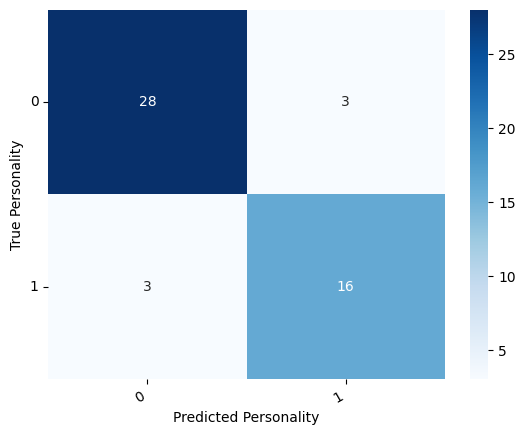

In [28]:
#This is the code block #28

def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
        
        plt.ylabel('True Personality')
        plt.xlabel('Predicted Personality')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

#The code defines a function called show_confusion_matrix which takes a confusion matrix as input and generates a heatmap plot of the matrix using the Seaborn library. 
#The confusion matrix is computed by calling the confusion_matrix function with the predicted labels and the actual labels. 
#The resulting confusion matrix is then passed to the show_confusion_matrix function to generate the heatmap plot, which displays the true personality labels on the y-axis and the predicted personality labels on the x-axis.

In [29]:
#This is the code block #29

def tokenize_function(text):
    return tokenizer(text, padding='max_length', max_length=256)

#The tokenize_function is a function that takes a text input and applies tokenization using a specified tokenizer.

In [30]:
#This is the code block #30
predict_path = os.listdir('processed_clean')

for path in predict_path:
    if path != '.ipynb_checkpoints':
        print("Proses Dataset:", path)
        df = df = pd.read_csv(f"processed_clean/{path}")
        predict_text = df['Text'].apply(tokenize_function)

        prediction = trainer.predict(predict_text)
        prediction = prediction.predictions.argmax(1)

        df['traits'] = prediction
        df['traits'] = df['traits'].map({0:"Neuroticism", 1:"Extraversion"})
        df['prediction'] = prediction 

        df.to_csv(f'dataset_classification/{path}', index=False)

#The code block processes multiple datasets in the "processed_clean" folder, predicts personality traits on each dataset using the previously trained model,
# adds the predicted traits to the data-frame, and saves the updated data-frame in the "dataset_classification" folder. 
#The predicted traits are represented as integers (0 or 1), and a dictionary is used to map them to the corresponding personality traits (Neuroticism or Extraversion).

FileNotFoundError: ignored

In [ ]:
#This is the code block #31

result_path = os.listdir('dataset_classification')

for path in result_path:
    if path != '.ipynb_checkpoints':
        df = pd.read_csv(f"dataset_classification/{path}")
        total = len(df)
        
        plt.figure(figsize=(6, 6))

        ax = sns.countplot(data=df, x = 'traits')

        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14)

        plt.xlabel("Traits")
        plt.ylabel("Jumlah")
        plt.title(f"{path.split('_')[0]} Traits (Total Data : {total})", fontsize=14)

        plt.show()

#The code block reads CSV files from the 'dataset_classification' folder and generates a count plot of the number of examples in each personality trait category (Neuroticism or Extraversion). 
#The plot displays the total number of examples in each category and is labeled with the name of the dataset and the total number of examples in the dataset. 
#Additionally, the code adds annotations to each bar in the plot to show the exact count of examples in each category. 